# Tugas 3 - Prediksi Volume Kendaraan Jam-an pada Interstate 94 dengan Pendekatan Random Forest

**Analisis dan Prediksi Volume Kendaraan Jam-an pada Interstate 94 dengan Pendekatan Random Forest**

## **1.1 Latar Belakang**

Interstate 94 merupakan salah satu jalan tol utama yang menghubungkan kota Minneapolis dan St. Paul, Minnesota, serta menjadi jalur penting bagi mobilitas masyarakat dan aktivitas ekonomi di wilayah tersebut. Jalan ini mengalami variasi volume lalu lintas setiap harinya, yang dipengaruhi oleh berbagai faktor seperti cuaca, waktu, dan hari libur. Kemacetan dan lonjakan volume kendaraan yang tidak terduga dapat menyebabkan kerugian waktu, peningkatan emisi, dan risiko keselamatan bagi pengguna jalan. Oleh karena itu, memahami pola volume kendaraan di jalur ini sangat penting untuk mendukung pengelolaan lalu lintas yang lebih baik.

Data historis dari Hourly Interstate 94 Westbound traffic volume memberikan peluang untuk menganalisis dan memprediksi jumlah kendaraan di jalur ini. Selain volume kendaraan, data ini juga mencakup fitur cuaca (suhu, curah hujan, salju) dan informasi hari libur, yang dapat memberikan wawasan tambahan tentang faktor-faktor yang memengaruhi lalu lintas. Dengan membangun model prediksi yang akurat, seperti Random Forest, pihak terkait dapat meningkatkan perencanaan dan pengelolaan transportasi secara signifikan, mengurangi kemacetan, dan menciptakan pengalaman perjalanan yang lebih aman dan efisien.

## **1.2 Tujuan Analisis**


Tujuan dari analisis ini adalah untuk memprediksi jumlah kendaraan yang melintas di Interstate 94 pada setiap jam tertentu dengan menggunakan model Random Forest. Analisis ini juga bertujuan untuk mengidentifikasi variabel-variabel utama yang memengaruhi volume kendaraan, seperti kondisi cuaca (suhu, curah hujan, salju) dan informasi hari libur. Dengan memahami hubungan antara faktor-faktor tersebut dan pola lalu lintas, hasil prediksi diharapkan dapat membantu dalam pengelolaan lalu lintas, pengambilan keputusan operasional, serta perencanaan infrastruktur yang lebih efisien.

Tujuan dari analisis ini adalah:  
1. **Memprediksi Volume Kendaraan**: Menggunakan model Random Forest untuk memprediksi jumlah kendaraan yang melintas di Interstate 94 pada setiap jam tertentu.  
2. **Menganalisis Faktor yang Berpengaruh**: Mengidentifikasi variabel utama seperti cuaca (suhu, curah hujan, salju) dan hari libur yang memengaruhi volume kendaraan.  


## **1.3 Rumusan Masalah**

Berdasarkan latar belakang yang telah dijelaskan, rumusan masalah dalam analisis ini adalah sebagai berikut:  

1. Bagaimana membangun model prediksi yang akurat untuk memproyeksikan volume kendaraan setiap jam di Interstate 94 menggunakan data historis?  
2. Faktor apa saja yang paling berpengaruh terhadap perubahan volume kendaraan, seperti kondisi cuaca atau hari libur?  
3. Seberapa baik model Random Forest dalam memprediksi volume kendaraan dibandingkan dengan pendekatan lain?  


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import LabelEncoder

# Load dataset
file_path = "Metro_Interstate_Traffic_Volume.csv"

data = pd.read_csv(file_path)
data.head()


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


## VISUALISASI DATA

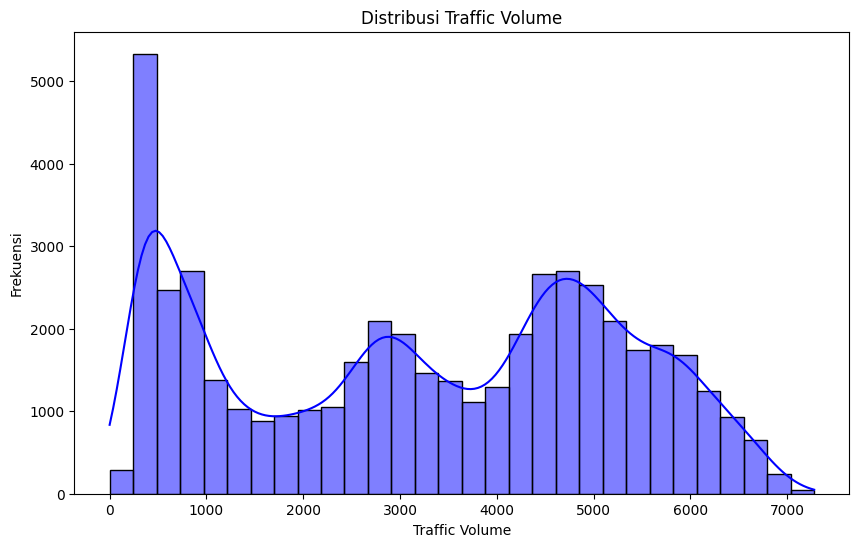

In [ ]:
# Statistik deskriptif untuk kolom numerik
numeric_stats = data.describe()

# Visualisasi distribusi target (traffic_volume)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data['traffic_volume'], bins=30, kde=True, color='blue')
plt.title('Distribusi Traffic Volume')
plt.xlabel('Traffic Volume')
plt.ylabel('Frekuensi')
plt.show()


Berdasarkan grafik distribusi traffic volume di atas, berikut adalah penjelasan yang dapat diberikan:

1. **Distribusi Traffic Volume**:
   - Data traffic volume menunjukkan distribusi yang tidak simetris, dengan beberapa puncak (multimodal). Hal ini mengindikasikan bahwa volume kendaraan memiliki pola tertentu yang mungkin bergantung pada waktu, seperti jam sibuk atau jam-jam tertentu di luar waktu kerja.
   - Nilai traffic volume mendominasi di rentang rendah (sekitar 0-1000), yang dapat mengindikasikan periode waktu dengan aktivitas lalu lintas yang sangat rendah, mungkin pada malam hari atau dini hari.

2. **Puncak Distribusi**:
   - Ada beberapa puncak distribusi pada rentang 4000-5000 dan 5000-6000, yang kemungkinan besar mencerminkan volume kendaraan yang tinggi selama jam sibuk seperti pagi atau sore hari.

3. **Skewness**:
   - Distribusi data tampaknya *right-skewed* (condong ke kanan), di mana terdapat lebih banyak nilai yang rendah dibandingkan nilai yang tinggi. Ini menunjukkan bahwa periode dengan lalu lintas rendah lebih sering terjadi dibandingkan periode dengan lalu lintas sangat tinggi.

4. **Variabilitas Data**:
   - Penyebaran data cukup luas, dengan volume kendaraan yang bervariasi dari nilai yang sangat rendah hingga sangat tinggi. Hal ini menunjukkan adanya dinamika lalu lintas yang signifikan pada Interstate 94, yang kemungkinan dipengaruhi oleh faktor eksternal seperti waktu, cuaca, atau hari libur.

Grafik ini memberikan wawasan awal yang dapat digunakan untuk menganalisis lebih lanjut faktor-faktor yang memengaruhi traffic volume serta pola-pola penting dalam data.

In [ ]:
# Konversi kolom date_time ke datetime
data['date_time'] = pd.to_datetime(data['date_time'])

# Ekstraksi fitur waktu
data['hour'] = data['date_time'].dt.hour       # Jam
data['day'] = data['date_time'].dt.day         # Hari
data['month'] = data['date_time'].dt.month     # Bulan
data['year'] = data['date_time'].dt.year       # Tahun
data['weekday'] = data['date_time'].dt.weekday # Hari dalam minggu (0=Senin)

# Menampilkan 5 data pertama setelah ekstraksi fitur waktu
data.head()


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,hour,day,month,year,weekday
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,9,2,10,2012,1
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,10,2,10,2012,1
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,11,2,10,2012,1
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,12,2,10,2012,1
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,13,2,10,2012,1


## PREPROCESSING

### Penanaganan Mising Value

In [ ]:
# Penanganan missing values
data.fillna(method='ffill', inplace=True)

C:\Users\Lenovo Pro\AppData\Local\Temp\ipykernel_2416\688818951.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


In [ ]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# One-hot encoding untuk fitur kategorikal
categorical_features = ['holiday', 'weather_main']
encoder = OneHotEncoder(sparse_output=False, drop='first')  # Gunakan sparse_output untuk versi scikit-learn terbaru
encoded_categorical = encoder.fit_transform(data[categorical_features])

# Menggabungkan hasil encoding dengan dataset
encoded_columns = encoder.get_feature_names_out(categorical_features)
encoded_df = pd.DataFrame(encoded_categorical, columns=encoded_columns, index=data.index)
data = pd.concat([data, encoded_df], axis=1)


In [ ]:
# Membuat lag features
lag_hours = [1, 3, 6]  # Lags untuk 1 jam, 3 jam, dan 6 jam sebelumnya
for lag in lag_hours:
    data[f'traffic_volume_lag_{lag}'] = data['traffic_volume'].shift(lag)

In [ ]:
# Seleksi fitur yang digunakan
selected_features = [
    'temp', 'rain_1h', 'snow_1h', 'clouds_all',
    'hour', 'weekday', 'month',
    *encoded_columns,  # Fitur hasil encoding
    *[f'traffic_volume_lag_{lag}' for lag in lag_hours]  # Lag features
]

In [ ]:
# Menghapus baris dengan nilai NaN akibat lagging
data = data.dropna()

In [ ]:
# Memisahkan fitur dan target
X = data[selected_features]
y = data['traffic_volume']

# Tampilkan informasi dataset setelah preprocessing
print(f"Fitur yang digunakan:\n{selected_features}")
print(f"Shape dataset setelah preprocessing: {X.shape}")

Fitur yang digunakan:
['temp', 'rain_1h', 'snow_1h', 'clouds_all', 'hour', 'weekday', 'month', 'holiday_Columbus Day', 'holiday_Independence Day', 'holiday_Labor Day', 'holiday_Martin Luther King Jr Day', 'holiday_Memorial Day', 'holiday_New Years Day', 'holiday_State Fair', 'holiday_Thanksgiving Day', 'holiday_Veterans Day', 'holiday_Washingtons Birthday', 'holiday_nan', 'weather_main_Clouds', 'weather_main_Drizzle', 'weather_main_Fog', 'weather_main_Haze', 'weather_main_Mist', 'weather_main_Rain', 'weather_main_Smoke', 'weather_main_Snow', 'weather_main_Squall', 'weather_main_Thunderstorm', 'traffic_volume_lag_1', 'traffic_volume_lag_3', 'traffic_volume_lag_6']
Shape dataset setelah preprocessing: (48078, 31)


In [ ]:
# Misalnya, data dan model sudah siap
features = data.columns.tolist()  # Kolom dari dataframe Anda yang digunakan dalam pelatihan


In [ ]:
# Simpan fitur ke file .npy
np.save('path_to_feature_names.npy', features)

## PROCESSING

In [ ]:
from sklearn.model_selection import train_test_split

# Pembagian data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

print(f"Shape X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"Shape y_train: {y_train.shape}, y_test: {y_test.shape}")


Shape X_train: (38462, 31), X_test: (9616, 31)
Shape y_train: (38462,), y_test: (9616,)


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Inisialisasi model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Melatih model
rf_model.fit(X_train, y_train)

# Prediksi pada data uji
y_pred = rf_model.predict(X_test)


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Fungsi untuk menghitung MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Menghitung MSE, RMSE, R2, dan MAPE
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

# Menampilkan hasil evaluasi
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


Mean Squared Error (MSE): 64098.21
Root Mean Squared Error (RMSE): 253.18
R-squared (R²): 0.98
Mean Absolute Percentage Error (MAPE): 7.06%


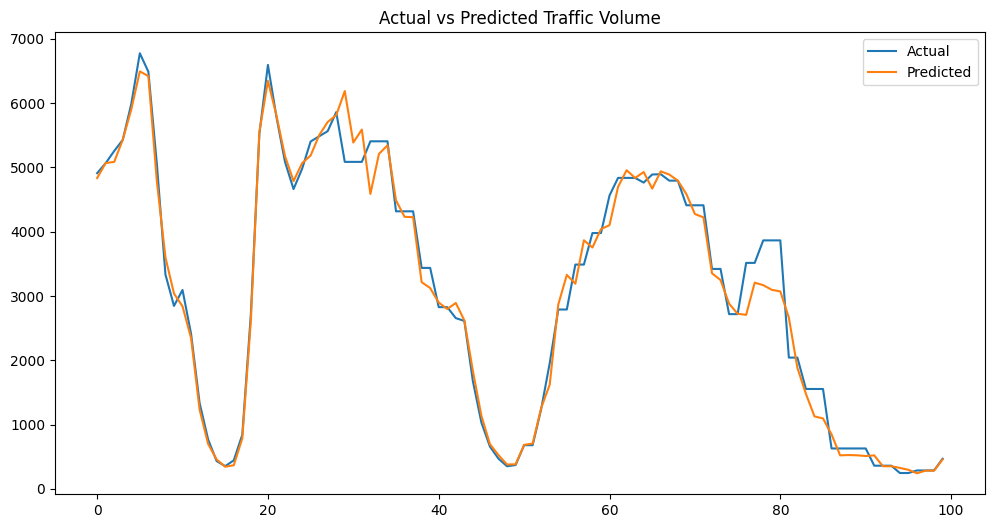

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_test.values[:100], label='Actual')
plt.plot(y_pred[:100], label='Predicted')
plt.legend()
plt.title('Actual vs Predicted Traffic Volume')
plt.show()


In [ ]:
import joblib

# Simpan model ke file
joblib.dump(rf_model, 'random_forest_model_project3.pkl')


['random_forest_model_project3.pkl']

In [ ]:
# %%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
import joblib

# Load model
model = joblib.load('random_forest_model_project3.pkl')

# Load feature names (assuming feature names were saved separately)
feature_names = np.load('path_to_feature_names.npy', allow_pickle=True)

# Fungsi untuk prediksi multistep
def predict_multistep(input_features, steps):
    predictions = []
    current_input = np.array(input_features).reshape(1, -1)
    for _ in range(steps):
        pred = model.predict(current_input)[0]
        predictions.append(pred)
        # Update input dengan prediksi baru
        current_input = np.roll(current_input, -1, axis=1)  # Geser input
        current_input[0, -1] = pred  # Tambahkan prediksi baru ke input
    return predictions

# UI Streamlit
st.title("Prediksi Volume Lalu Lintas")

# Input jumlah jam prediksi
steps = st.number_input("Jumlah Jam yang Diprediksi", min_value=1, max_value=24, value=3)

# Tombol untuk prediksi
if st.button("Prediksi"):
    # Gunakan data default untuk input fitur
    default_input_features = [290.0, 0.0, 0.0, 40.0, 12, 0, 1] + [0] * 21 + [4000.0, 4200.0, 4500.0]  # Nilai default untuk masing-masing fitur
    predictions = predict_multistep(default_input_features, steps)
    st.write(f"Prediksi Volume Lalu Lintas untuk {steps} Jam ke Depan:")
    for i, pred in enumerate(predictions, 1):
        st.write(f"Jam {i}: {pred:.2f}")



Overwriting app.py


In [ ]:
!wget -q -O - ipv4.icanhazip.com

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
!streamlit run app.py & npx localturnel --port 8501

^C


Saya juga membangun aplikasi untuk memudahkan dalam memprediksi dengan menggunakan streamlit. berikut adalah link nya :
https://huggingface.co/spaces/Aanadi/ProyekSainData
